In [1]:
%matplotlib notebook

import sys
import os
import time

paths = ['d:/code/broadbean', 'd:/code/labtools', 'd:/code/v2_dataset_tools']
for p in paths:
    if p not in sys.path:
        sys.path.append(p)
        
import numpy as np
import qcodes as qc
import broadbean as bb

from matplotlib import pyplot as plt
from broadbean.plotting import plotter

from labtools.mplplots.init_nb_plotting import *
from labtools.mplplots import plots as mplplots
from labtools.mplplots import tools as mpltools

from v2_dataset_tools.experiments import do_experiment, get_results_from_db_path

In [2]:
from qcodes.dataset.measurements import Measurement
from qcodes.dataset.plotting import plot_by_id
from qcodes.dataset.data_set import DataSet
from qcodes.sweep import sweep, nest, chain, szip, getter, setter
from qcodes.sweep.sweep import ParameterSweep, Nest, ParameterWrapper, FunctionWrapper, FunctionSweep, getter

In [34]:
ds = qc.load_by_id(91)
ds

results #91@./experiments.db
----------------------------
awg5014_ch2_offset - numeric
RF_frequency - numeric
LO_frequency - numeric
I - numeric
Q - numeric
Abs - numeric

In [35]:
vvals = np.array(ds.get_values('awg5014_ch2_offset'))
fvals = np.array(ds.get_values('RF_frequency'))
absvals = np.array(ds.get_values('Abs'))
ivals = np.array(ds.get_values('I'))

In [36]:
nfvals = np.unique(fvals).size
nvvals = np.unique(vvals).size
print(nfvals, nvvals)

if absvals.size < nfvals * nvvals:
    nvvals2 = nvvals-1
else:
    nvvals2 = nvvals
    
absvals2 = absvals[:nfvals*nvvals2]

51 51


<IPython.core.display.Javascript object>


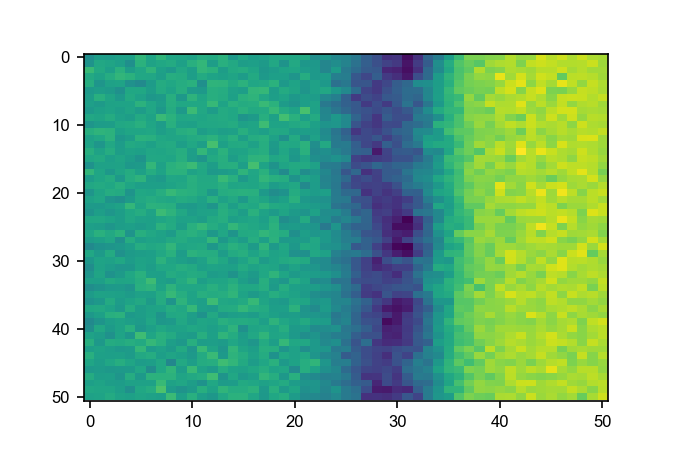

In [37]:
fig, ax = plt.subplots(1,1)
ax.imshow(absvals[:nfvals*nvvals2].reshape(nvvals2, nfvals), aspect='auto')